# Project 3: Web APIs & NLP

## Pre-Processing and Modeling

In [502]:
import pandas as pd
import numpy as np
import scikitplot as skplt
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from wordcloud import WordCloud
from PIL import Image

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, plot_confusion_matrix


In [478]:
cfb = pd.read_csv('data/cfb.csv')
nfl = pd.read_csv('data/nfl.csv')

In [479]:
data = pd.read_csv('data/data.csv')
data.head()

,subreddit,title
0,1,NCAA Football 2020 #5 FLORIDA VS MISSISSIPPI
1,1,Arizona LB Colin Schooler Announces Transfer
2,1,Texas State to Play at BYU for 2020 Schedule
3,1,2023 4* CB Shawn Russ commits to Florida
4,1,"Opinion: As COVID-19 grips more campuses, coll..."


### Tokenize and Lemmatize our Data

In [480]:
# tokenizer = RegexpTokenizer(r'\w+')
# lemmatizer = WordNetLemmatizer()

# def lemmatize_words(text):
#     return [lemmatizer.lemmatize(i) for i in tokenizer.tokenize(text)]

# data['title'] = data.title.apply(lemmatize_words)

In [481]:
# data['title']

In [482]:
# data.to_csv('data/data_lem.csv')

### Count Vectorizer and Word Counts

In [483]:
# Instantiate a CountVectorizer.
cvec = CountVectorizer()

In [484]:
cvec.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [485]:
cvec = CountVectorizer(stop_words = "english") 

cfb_words = cvec.fit_transform(cfb['title']).toarray()

In [486]:
cfb_words = pd.DataFrame(cfb_words,
                          columns=cvec.get_feature_names())

In [487]:
cfb_top_words = cfb_words.sum().sort_values(ascending = False)
cfb_top_words[:15]

football      446
2021          299
commits       281
season        269
state         208
fall          201
college       161
2020          161
conference    149
big           123
game          118
ncaa          113
sports        110
play          104
covid          99
dtype: int64

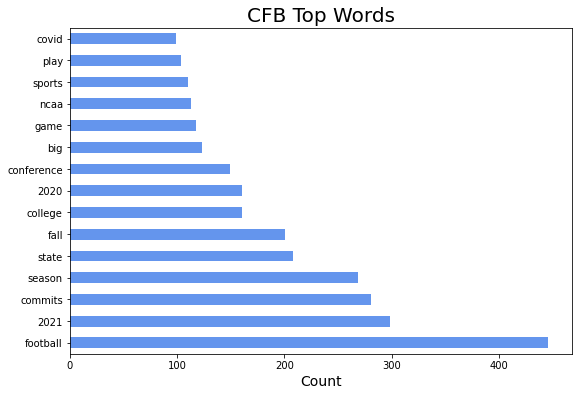

In [746]:
cfb_top_words[:15].plot(kind = 'barh', figsize = (9,6), color = 'cornflowerblue')
plt.title('CFB Top Words', fontsize = 20)
plt.xlabel('Count', fontsize = 14);

In [489]:
cvec = CountVectorizer(stop_words = "english") 

nfl_words = cvec.fit_transform(nfl['title']).toarray()

In [490]:
nfl_words = pd.DataFrame(nfl_words,
                          columns=cvec.get_feature_names())

In [491]:
nfl_top_words = nfl_words.sum().sort_values(ascending = False)
nfl_top_words[:15]

nfl           467
season        230
team          221
football      156
2020          149
players       144
washington    118
year          116
covid         111
source        110
today         102
player        101
new            94
highlight      81
19             80
dtype: int64

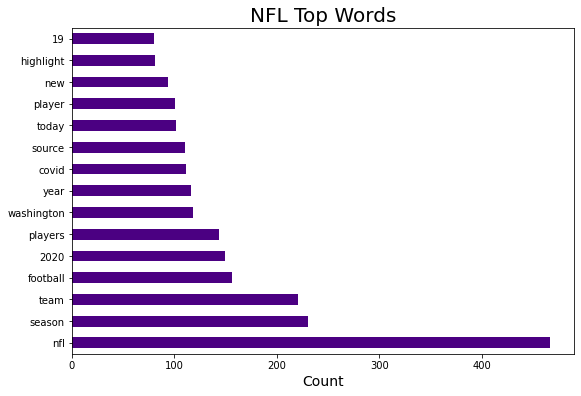

In [744]:
nfl_top_words[:15].plot(kind = 'barh', figsize = (9,6), color = 'indigo')
plt.title('NFL Top Words', fontsize = 20)
plt.xlabel('Count', fontsize = 14);

### Word Cloud

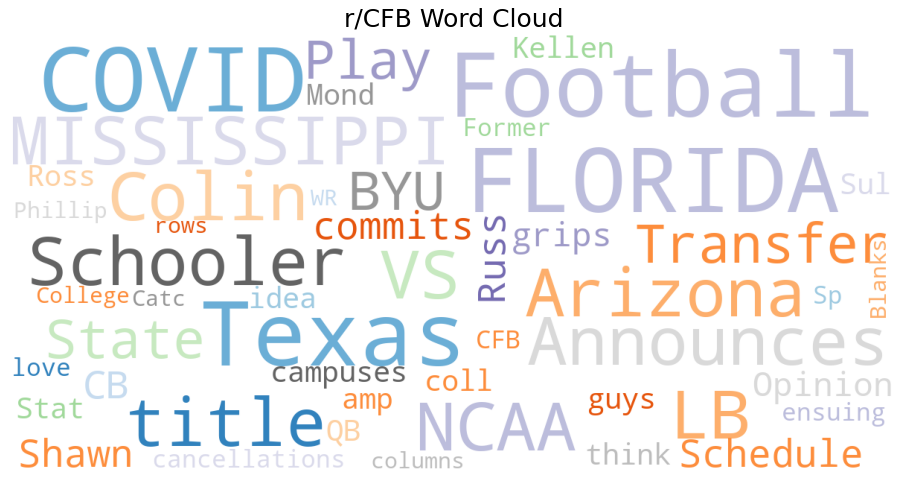

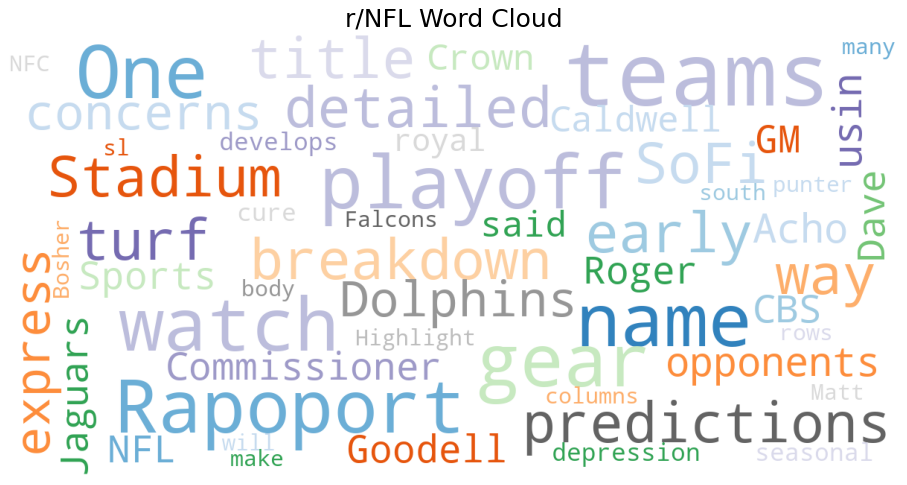

In [707]:
# From StackOverflow - How to create a word cloud from a corpus in Python?

def show_wordcloud(data, title = None):
    
    wordcloud = WordCloud(
        background_color='white',
        max_words=500,
        max_font_size=40, 
        scale=3,
        random_state=42,
        colormap = 'tab20c'
    ).generate(str(data))
    
    plt.figure(1, figsize=(16, 10))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(title, fontsize = 25)
    plt.show()

show_wordcloud(cfb[['title']], title = 'r/CFB Word Cloud')
print("")
print("")
show_wordcloud(nfl[['title']], title = 'r/NFL Word Cloud')

### Stop Words

In [574]:
print(stopwords.words('english'))
stop_words = stopwords.words('english')
print(len(stop_words))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [575]:
add_stop_words = ['covid', 'football', 'team', 'player', 'season', 2020, 19]

In [576]:
for i in add_stop_words:
    stop_words.append(i)

In [577]:
print(len(stop_words))

186


### Modeling - First Model

In [676]:
X = data['title']
y = data['subreddit']

In [566]:
y.value_counts(normalize = True)

1    0.5
0    0.5
Name: subreddit, dtype: float64

In [567]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    stratify=y)

In [568]:
y_train.value_counts(normalize = True)

1    0.5
0    0.5
Name: subreddit, dtype: float64

**Multinomial Naive Bayes Using CountVectorizer**

In [600]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', MultinomialNB())
])

params = {
    'cvec__stop_words': [stop_words],
    'cvec__max_features': [7_000],
    'cvec__min_df': [1],
    'cvec__max_df': [.65],
    'cvec__ngram_range': [(1,1)]
}

gs = GridSearchCV(pipe, param_grid=params, cv=7, n_jobs = -1)
gs.fit(X_train, y_train)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('nb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'cvec__max_df': [0.65], 'cvec__max_features': [7000],
                         'cvec__min_df': [1], 'cvec__ngram_range': [(1, 1)],
                         'cvec__stop_words': [['i', 'me', 'my', 'myself', 'we',
                                               'our', 'ours', 'ourselves',
                                               'you', "you're", "you've",
                                               "you'll", "you'd", 'your',
                                               'yours', 'yourself',
                                               'yourselves', 'he', 'him', 'his',
                                               'himself', 'she', "she's", 'her',
                                               'hers', 'herself', 'it', "it's",
                                               'its', 

In [601]:
print(f'Best score is {gs.best_score_}')

Best score is 0.9143348862975031


In [602]:
print(f'Best params are {gs.best_params_}')

Best params are {'cvec__max_df': 0.65, 'cvec__max_features': 7000, 'cvec__min_df': 1, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', '

In [603]:
# Score model on training set.
print(gs.score(X_train, y_train)) # NB

0.9743333333333334


In [604]:
# Score model on testing set.
print(gs.score(X_test, y_test)) # NB

0.933


In [749]:
# Get predictions
preds = gs.predict(X_test)
probas = gs.predict_proba(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

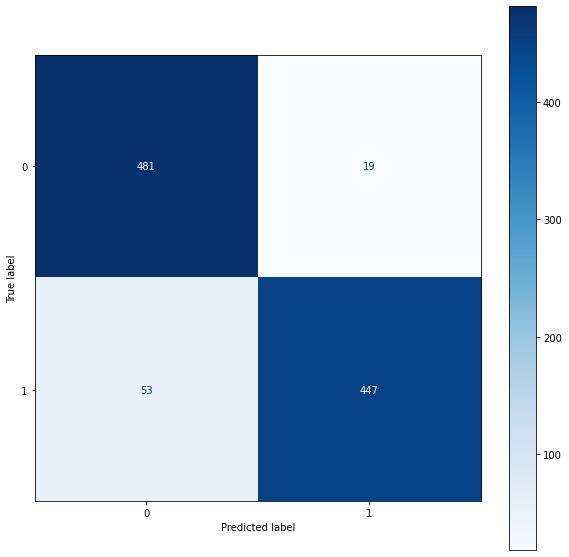

In [747]:
# View confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(gs, X_test, y_test, cmap='Blues', values_format='d', ax=ax);

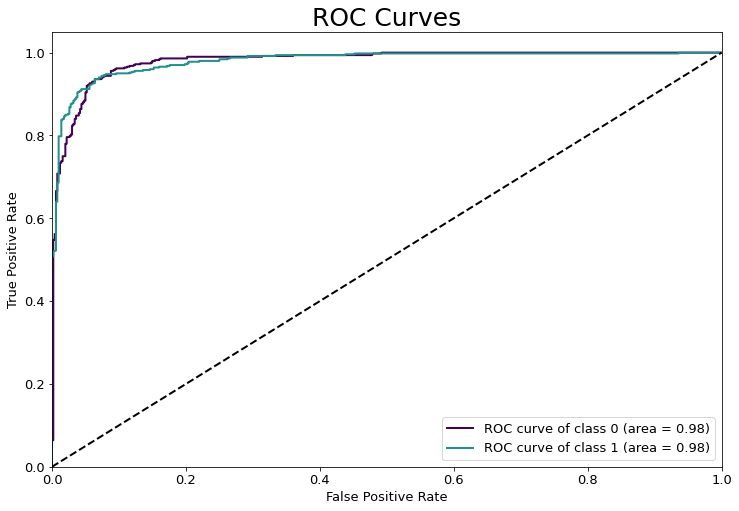

In [733]:
skplt.metrics.plot_roc(y_test, probas, figsize = (12,8), plot_micro = False, plot_macro = False, title_fontsize = 25, text_fontsize = 13, cmap = 'viridis')
plt.show()

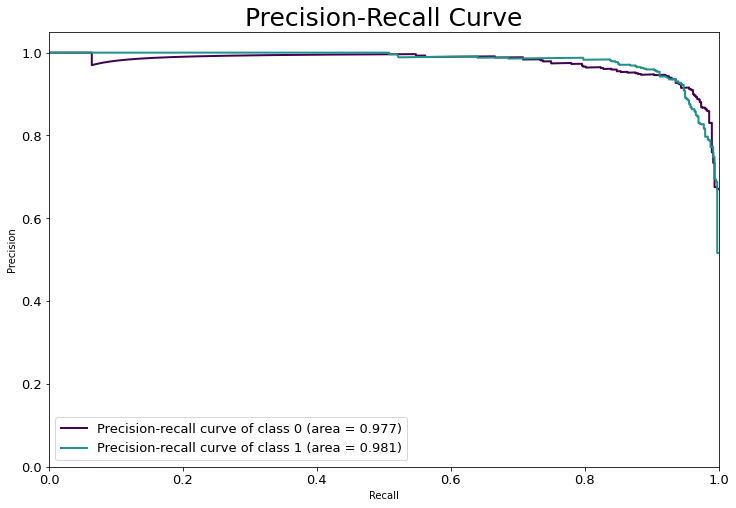

In [750]:
skplt.metrics.plot_precision_recall(y_test, probas, plot_micro = False,
                       title="Precision-Recall Curve", figsize=(12,8), title_fontsize = 25, text_fontsize = 13, cmap = 'viridis');

**Multinomial Naive Bayes Using TfidfVectorizer**

In [258]:
model_params = {}
count = 0

In [630]:
pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

params = {
    'tvec__stop_words': ['english'],
    'tvec__max_features': [4_000],
    'tvec__min_df': [1],
    'tvec__max_df': [.6],
    'tvec__ngram_range': [(1,1)]
    
}

gs = GridSearchCV(pipe, param_grid=params, cv = 7, n_jobs = 3)
gs.fit(X_train, y_train)

count += 1

gs.best_params_['score'] = gs.best_score_
model_params[f'model_{count}'] = gs.best_params_

model_df = pd.DataFrame.from_dict(model_params).T
model_df

,tvec__max_df,tvec__max_features,tvec__min_df,tvec__ngram_range,tvec__stop_words,score,dt__ccp_alpha,dt__max_depth,dt__min_samples_leaf,dt__min_samples_split
model_1,0.8,10000,2,"(1, 2)",english,0.913333,NaN,NaN,NaN,NaN
model_2,0.7,12000,1,"(1, 2)",english,0.919,NaN,NaN,NaN,NaN
model_3,0.65,14000,1,"(1, 2)",english,0.920333,NaN,NaN,NaN,NaN
model_4,0.65,12000,1,"(1, 2)",english,0.919,NaN,NaN,NaN,NaN
model_5,0.65,20000,1,"(1, 3)",english,0.920667,NaN,NaN,NaN,NaN
model_6,0.7,12000,1,"(1, 2)",english,0.919,NaN,NaN,NaN,NaN
model_7,0.7,12000,1,"(1, 2)",english,0.746,0,7,2,20
model_8,0.7,12000,1,"(1, 2)",english,0.919,NaN,NaN,NaN,NaN
model_9,0.7,12000,1,"(1, 2)","[i, me, my, myself, we, our, ours, ourselves, ...",0.914333,NaN,NaN,NaN,NaN
model_10,0.7,8000,1,"(1, 1)","[i, me, my, myself, we, our, ours, ourselves, ...",0.911669,NaN,NaN,NaN,NaN


In [631]:
# Score model on training set.
print(gs.score(X_train, y_train))

0.9723333333333334


In [632]:
# Score model on testing set.
print(gs.score(X_test, y_test))

0.923


In [633]:
# Get predictions
preds = gs.predict(X_test)
probas = gs.predict_proba(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

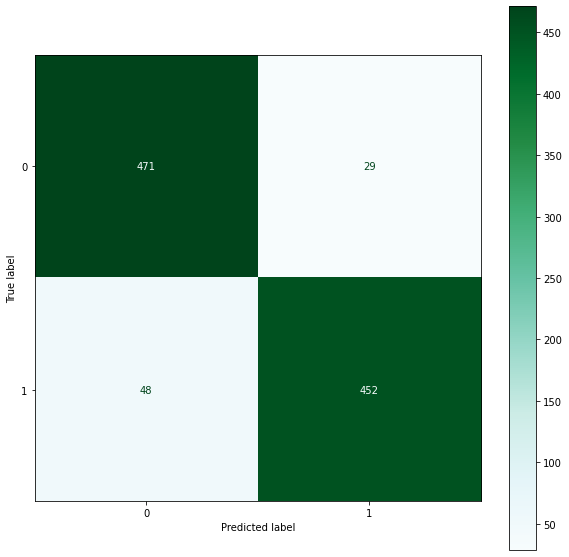

In [635]:
# View confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(gs, X_test, y_test, cmap='BuGn', ax=ax);

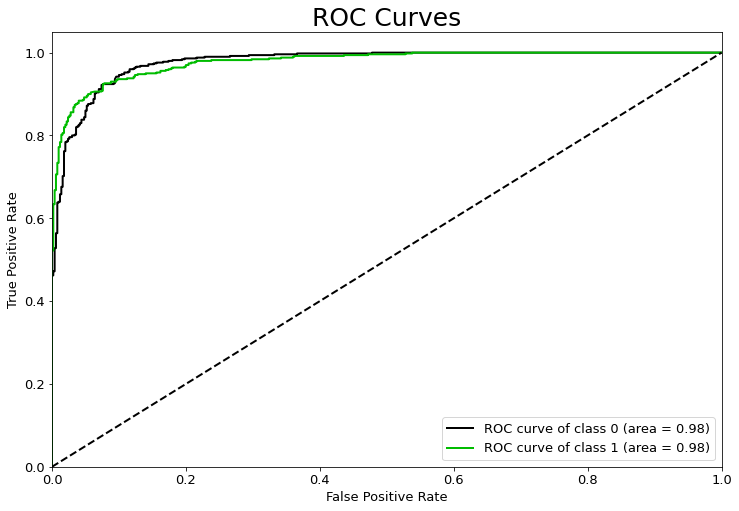

In [636]:
skplt.metrics.plot_roc(y_test, probas, figsize = (12,8), plot_micro = False, plot_macro = False, title_fontsize = 25, text_fontsize = 13)
plt.show()

### Modeling - Second Model

**Tfidf with DecisionTreeClassifier**

In [283]:
model2_params = {}
count = 0

In [647]:
pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('dt', DecisionTreeClassifier())
])

params = {
    'tvec__stop_words': [stop_words],
    'tvec__max_features': [5_000],
    'tvec__min_df': [2],
    'tvec__max_df': [.85],
    'tvec__ngram_range': [(1,1)]
}

gs = GridSearchCV(pipe, param_grid=params, cv = 5, n_jobs = 6)
gs.fit(X_train, y_train)

count += 1

gs.best_params_['score'] = gs.best_score_
model2_params[f'model2_{count}'] = gs.best_params_

model2_df = pd.DataFrame.from_dict(model2_params).T
model2_df

,tvec__max_df,tvec__max_features,tvec__min_df,tvec__ngram_range,tvec__stop_words,score,dt__ccp_alpha,dt__max_depth,dt__min_samples_leaf,dt__min_samples_split
model2_1,0.9,12000,2,"(1, 1)",english,0.863333,NaN,NaN,NaN,NaN
model2_2,0.85,12000,2,"(1, 1)",english,0.861,NaN,NaN,NaN,NaN
model2_3,0.9,12000,2,"(1, 1)",english,0.748,0.001,7,2,5
model2_4,0.9,12000,2,"(1, 1)",english,0.861667,0,None,1,4
model2_5,0.9,3000,2,"(1, 1)",english,0.859333,0,None,1,2
model2_20,0.85,3000,1,"(1, 1)",english,0.861667,NaN,NaN,NaN,NaN
model2_21,0.95,4000,1,"(1, 2)","[i, me, my, myself, we, our, ours, ourselves, ...",0.853333,NaN,NaN,NaN,NaN
model2_22,0.9,5000,2,"(1, 1)","[i, me, my, myself, we, our, ours, ourselves, ...",0.855333,NaN,NaN,NaN,NaN
model2_23,0.85,5000,2,"(1, 1)","[i, me, my, myself, we, our, ours, ourselves, ...",0.854667,NaN,NaN,NaN,NaN
model2_24,0.85,5000,2,"(1, 1)","[i, me, my, myself, we, our, ours, ourselves, ...",0.849333,NaN,NaN,NaN,NaN


In [648]:
# Score model on training set.
print(f'Training Score: {gs.score(X_train, y_train)}')
# Score model on testing set.
print(f'Testing Score: {gs.score(X_test, y_test)}')

Training Score: 0.9966666666666667
Testing Score: 0.879


### Modeling - Third Model

**Tfdif with RandomForestClassifier**

In [292]:
model3_params = {}
count = 0

In [659]:
pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('rf', RandomForestClassifier())
])

params = {
    'tvec__stop_words': [stop_words],
    'tvec__max_features': [4000],
    'tvec__min_df': [2],
    'tvec__max_df': [.95],
    'tvec__ngram_range': [(1,2)],
}

gs = GridSearchCV(pipe, param_grid=params, cv = 5, n_jobs = 6)
gs.fit(X_train, y_train)

count += 1

gs.best_params_['score'] = gs.best_score_
model3_params[f'model3_{count}'] = gs.best_params_

model3_df = pd.DataFrame.from_dict(model3_params).T
model3_df

,tvec__max_df,tvec__max_features,tvec__min_df,tvec__ngram_range,tvec__stop_words,score,rf__n_estimators
model2_1,0.9,3000,2,"(1, 1)",english,0.899,NaN
model2_2,0.85,3000,2,"(1, 1)",english,0.884667,10
model2_3,0.85,3000,2,"(1, 1)",english,0.899667,100
model3_26,0.9,3000,2,"(1, 1)","[i, me, my, myself, we, our, ours, ourselves, ...",0.897,100
model3_27,0.95,4000,2,"(1, 2)","[i, me, my, myself, we, our, ours, ourselves, ...",0.897,NaN
model3_28,0.95,5000,1,"(1, 2)","[i, me, my, myself, we, our, ours, ourselves, ...",0.898,105
model3_29,0.95,4000,2,"(1, 2)","[i, me, my, myself, we, our, ours, ourselves, ...",0.894,NaN
model3_30,0.95,4000,2,"(1, 2)","[i, me, my, myself, we, our, ours, ourselves, ...",0.893667,NaN


In [660]:
# Score model on training set.
print(f'Training Score: {gs.score(X_train, y_train)}')
# Score model on testing set.
print(f'Testing Score: {gs.score(X_test, y_test)}')

Training Score: 0.9953333333333333
Testing Score: 0.921


In [661]:
# Get predictions
preds = gs.predict(X_test)
probas = gs.predict_proba(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

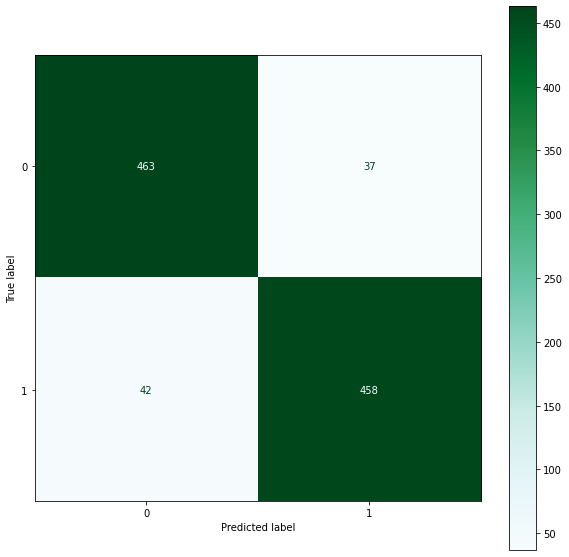

In [662]:
# View confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(gs, X_test, y_test, cmap='BuGn', values_format='d', ax=ax);

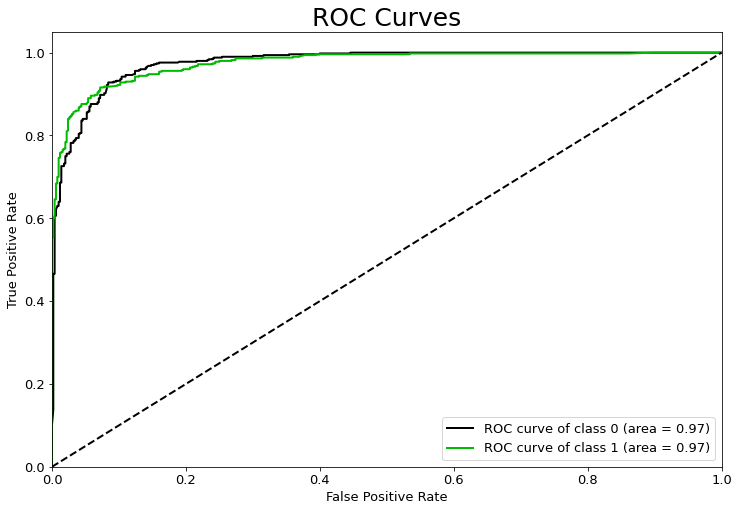

In [663]:
skplt.metrics.plot_roc(y_test, probas, figsize = (12,8), plot_micro = False, plot_macro = False, title_fontsize = 25, text_fontsize = 13)
plt.show()

### Modeling - Fourth Model

**Support Vector Machines**

In [307]:
model4_params = {}
count = 0

In [668]:
pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('svc', SVC())
])

params = {
    'tvec__stop_words': [stop_words],
    'tvec__max_features': [6000],
    'tvec__min_df': [1],
    'tvec__max_df': [.9],
    'tvec__ngram_range': [(1,1)],
    'svc__probability': [True]
}

gs = GridSearchCV(pipe, param_grid=params, cv = 5, n_jobs=-1)
gs.fit(X_train, y_train)

count += 1

gs.best_params_['score'] = gs.best_score_
model4_params[f'model4_{count}'] = gs.best_params_

model4_df = pd.DataFrame.from_dict(model4_params).T
model4_df

,tvec__max_df,tvec__max_features,tvec__min_df,tvec__ngram_range,tvec__stop_words,score,svc__degree,svc__kernel,svc__probability
model4_1,0.85,3000,2,"(1, 1)",english,0.915667,NaN,NaN,NaN
model4_2,0.85,3000,2,"(1, 1)",english,0.912667,2,poly,NaN
model4_3,0.8,5000,1,"(1, 1)",english,0.913667,2,poly,NaN
model4_4,0.8,5000,2,"(1, 2)",english,0.889333,3,poly,NaN
model4_5,0.8,5000,1,"(1, 2)",english,0.917,NaN,NaN,NaN
model4_6,0.75,7000,1,"(1, 2)",english,0.917667,NaN,NaN,NaN
model4_7,0.75,7000,1,"(1, 2)",english,0.917667,NaN,NaN,True
model4_31,0.75,6000,1,"(1, 1)","[i, me, my, myself, we, our, ours, ourselves, ...",0.915,NaN,NaN,True
model4_32,0.9,6000,1,"(1, 1)","[i, me, my, myself, we, our, ours, ourselves, ...",0.915,NaN,NaN,True
model4_33,0.6,6000,1,"(1, 1)","[i, me, my, myself, we, our, ours, ourselves, ...",0.915,NaN,NaN,True


In [669]:
# Score model on training set.
print(f'Training Score: {gs.score(X_train, y_train)}')
# Score model on testing set.
print(f'Testing Score: {gs.score(X_test, y_test)}')

Training Score: 0.9976666666666667
Testing Score: 0.928


In [670]:
# Get predictions
preds = gs.predict(X_test)
probas = gs.predict_proba(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

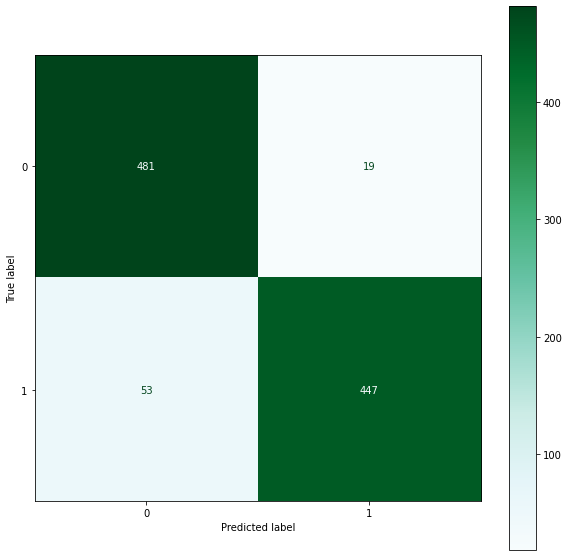

In [671]:
# View confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(gs, X_test, y_test, cmap='BuGn', values_format='d', ax=ax);

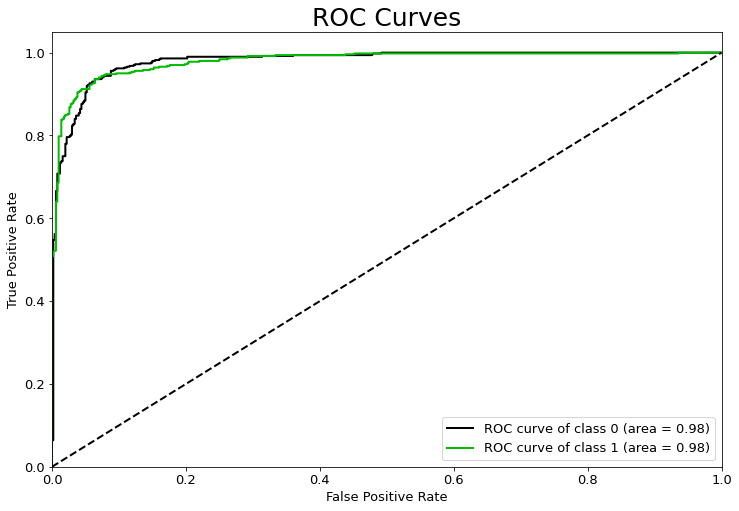

In [672]:
skplt.metrics.plot_roc(y_test, probas, figsize = (12,8), plot_micro = False, plot_macro = False, title_fontsize = 25, text_fontsize = 13)
plt.show()

**Conclusions**

- I found the simple naive bayes to produce the best results out of the models tested. Using CountVectorizer and MultinomialNB, I achieved the best accuracy scores (train / test scores: 0.9743 / 0.933).

- Support Vector Machines improved the most with the addition of unique stopwords (up from ~.88 to ~.93 - I would like to test this model out with more stopwords removed(only added 5 to the default) and certain special characters in place as well as testing different specific parameters.

**Model Improvements** 

- Collecting more training data should help some of the overfit in the models.  Did notice some cross-posting in the subreddits (posts being shared in each of r/CFB and r/nfl) - I fortunately did not really run into this issue with the data that was scraped, but can see this being an issue with a larger dataset.

- Editing our stopwords to remove additional words that are not unique to each subreddit should improve our scores as well as testing out more specific gridsearch parameters for each model.